In [1]:
import pandas as pd
import numpy as np

In [2]:
player_attribute = pd.read_csv("./player_attribute.csv")

In [ ]:
player_attribute

In [ ]:
print(player_attribute.info())
player_attribute.head()

### 確認每個欄位是否符合常態分配，使用QQ圖檢視

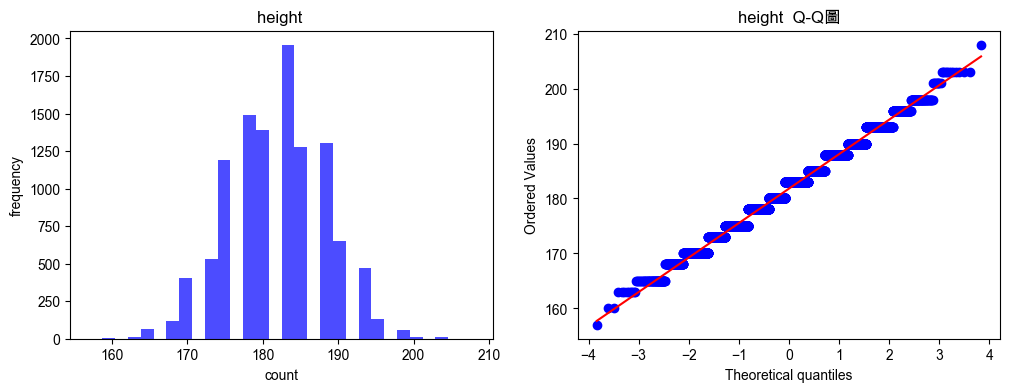

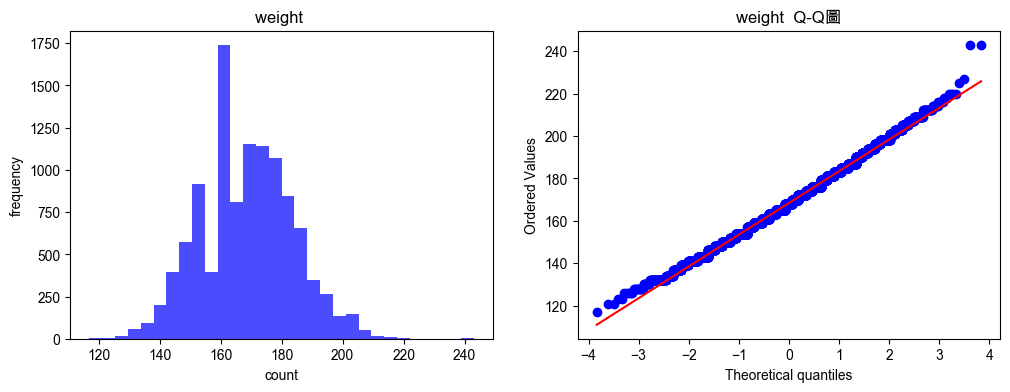

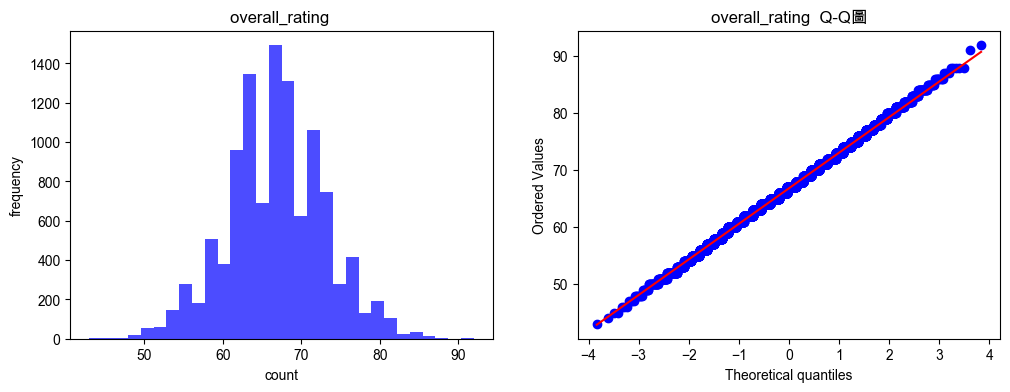

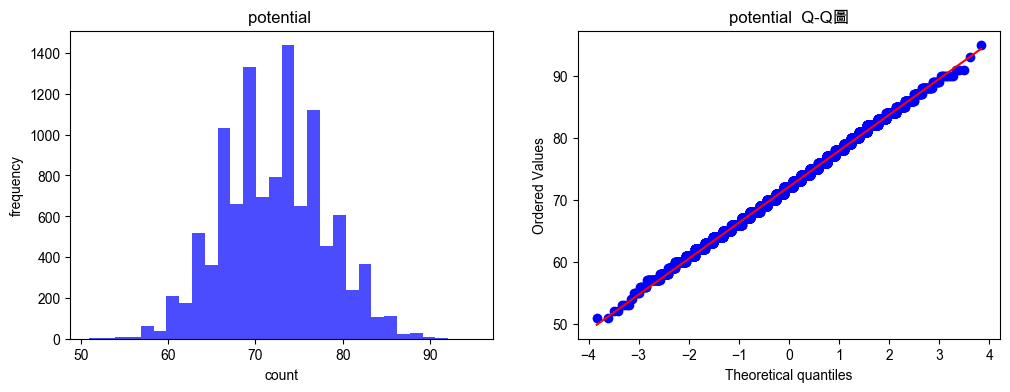

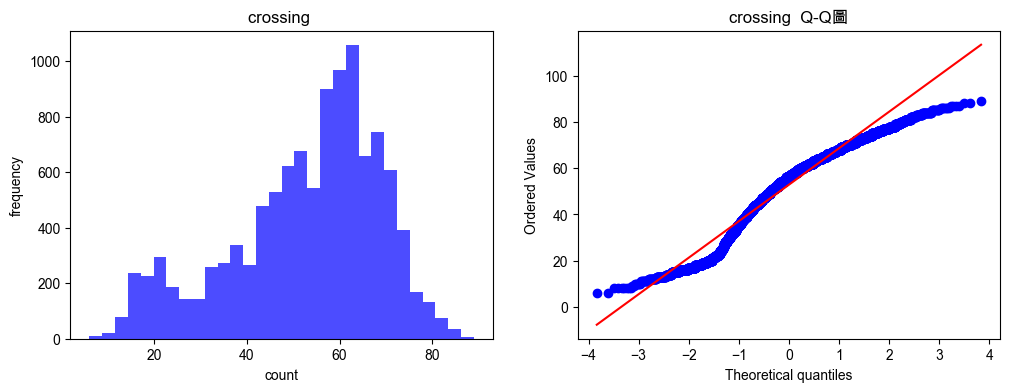

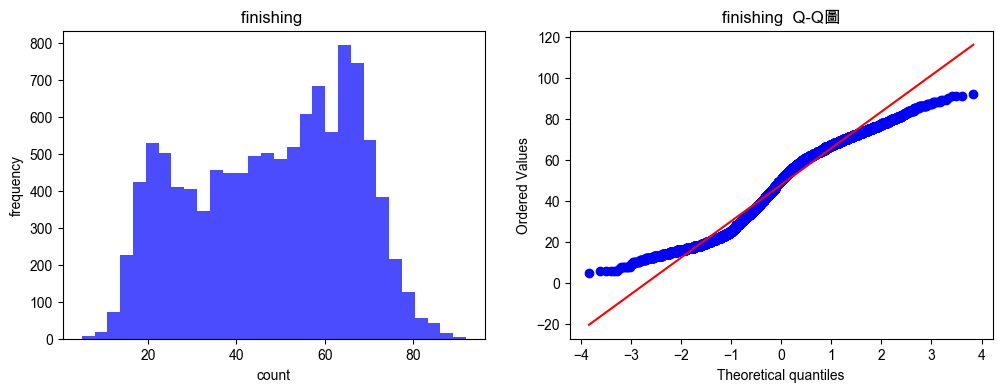

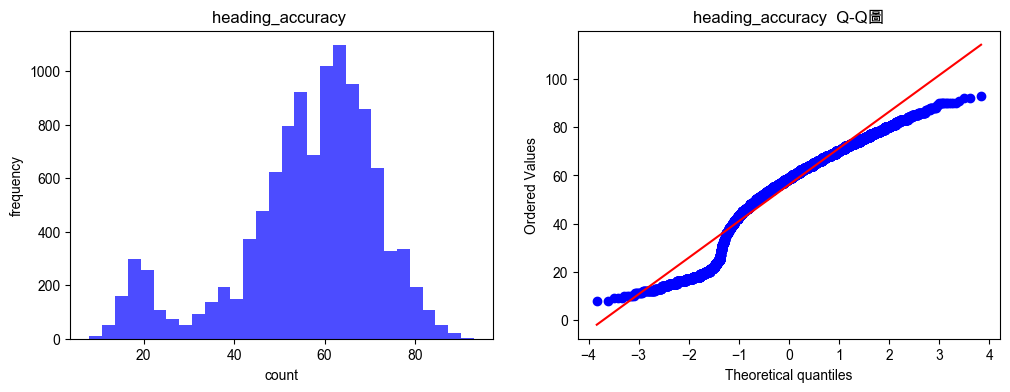

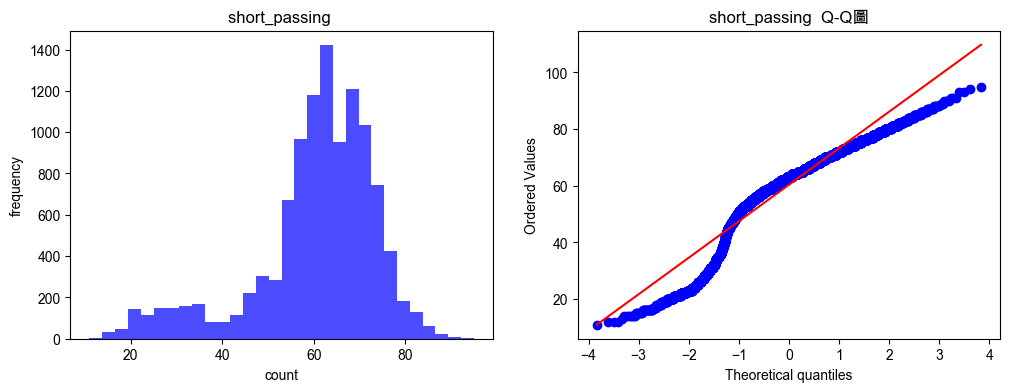

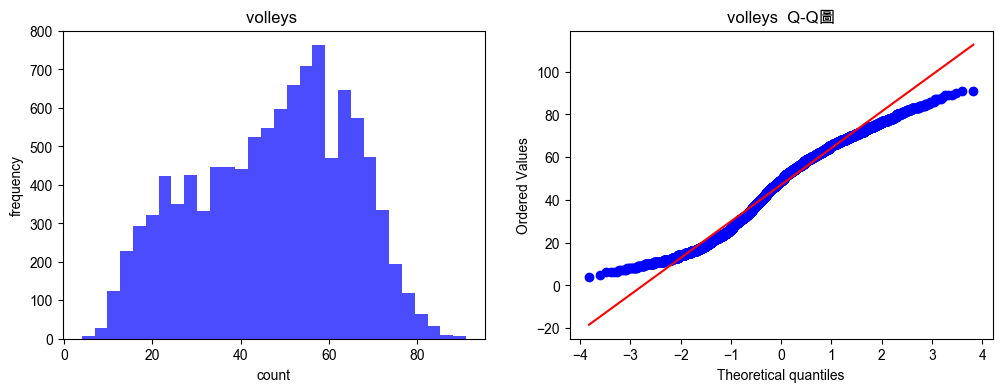

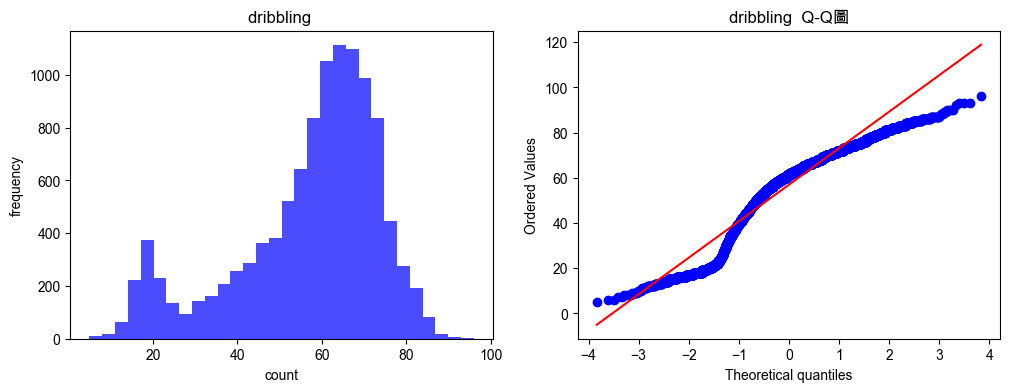

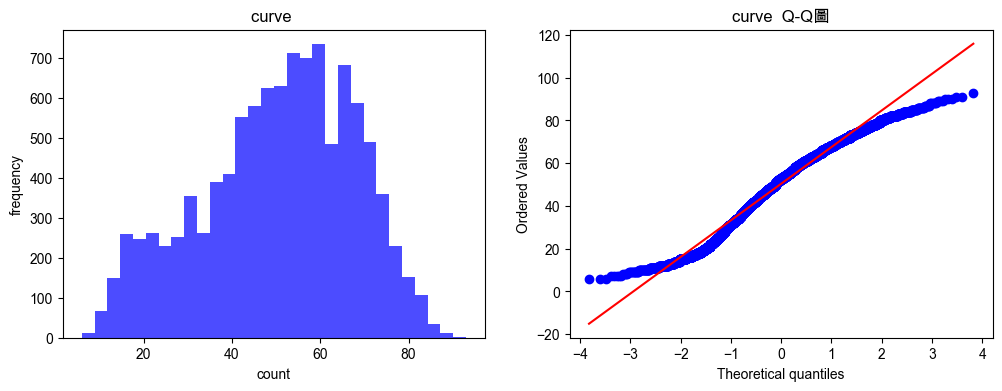

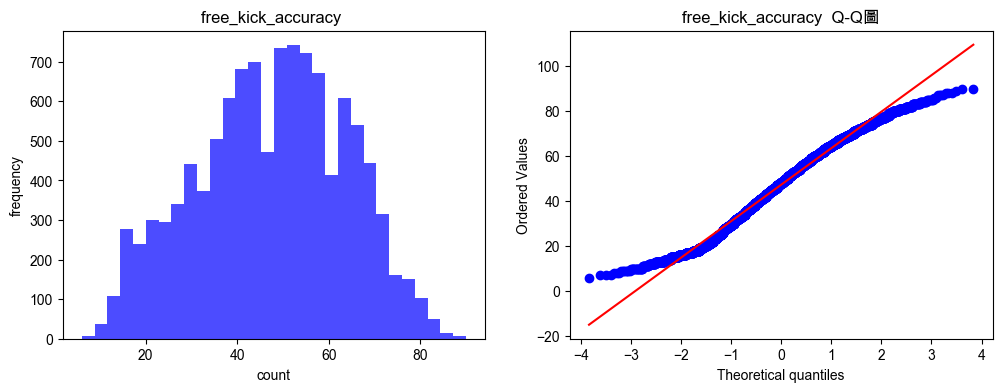

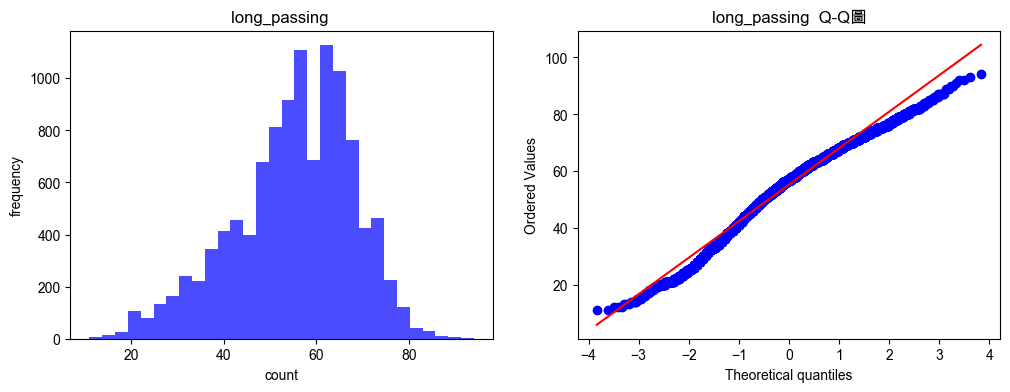

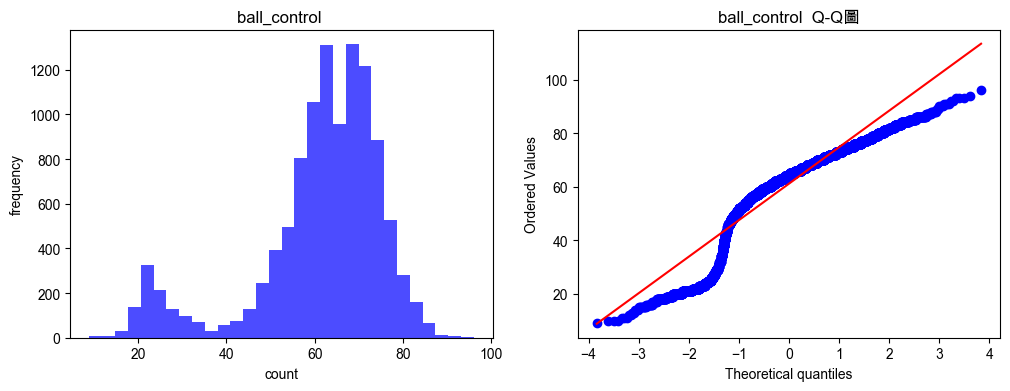

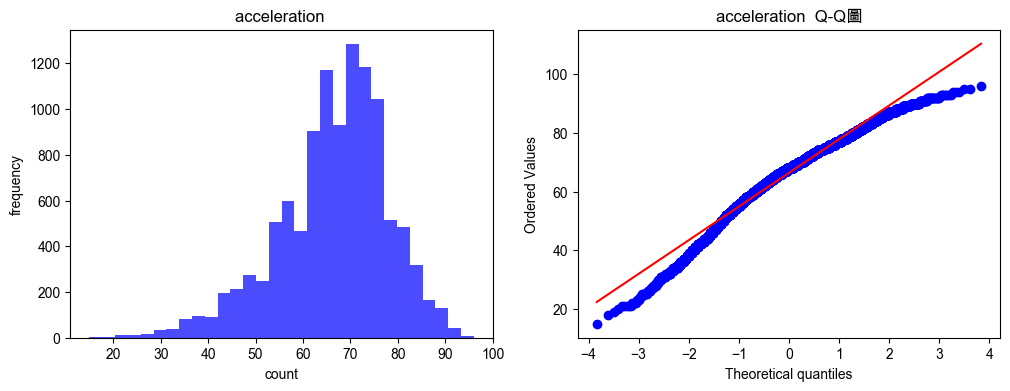

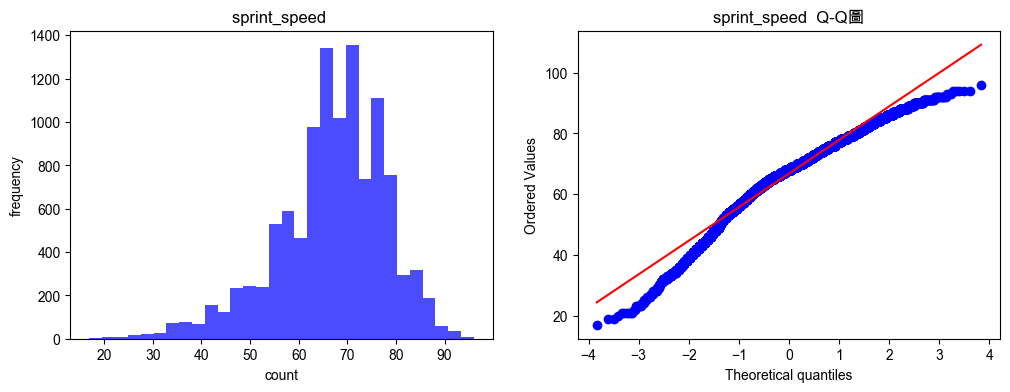

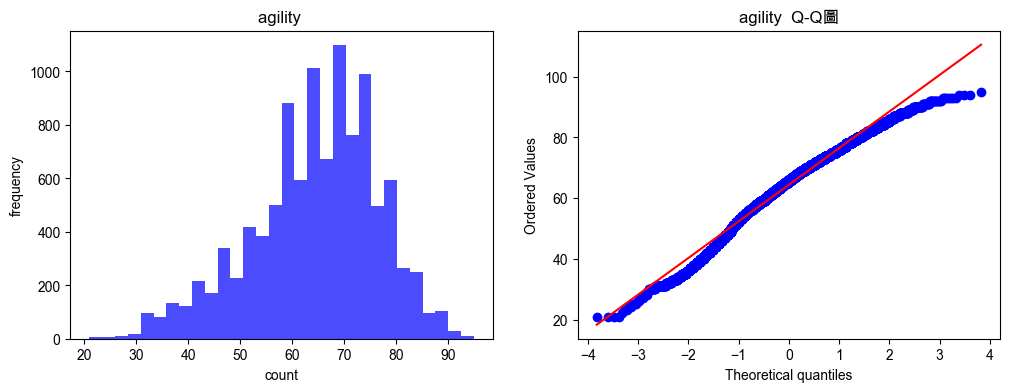

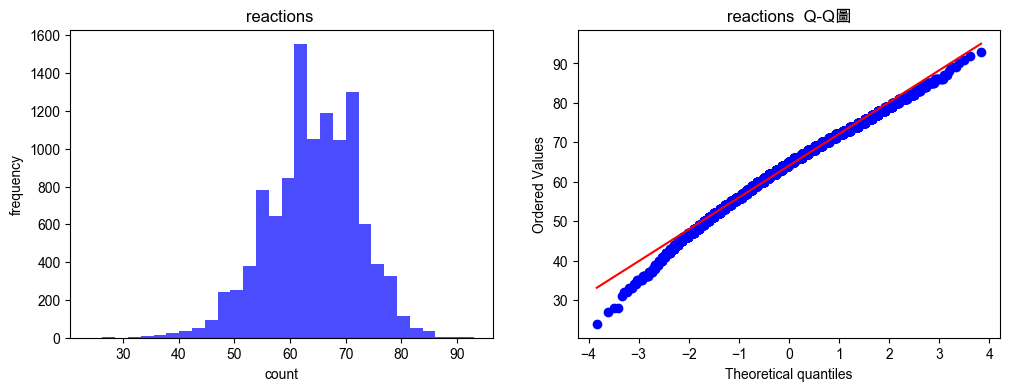

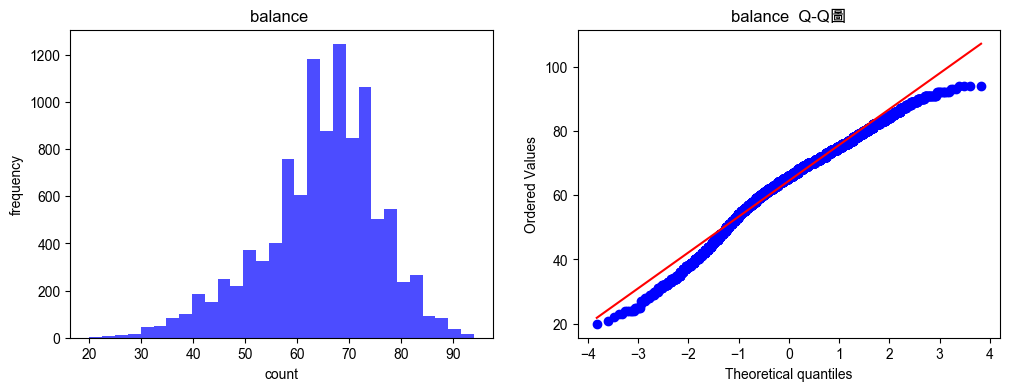

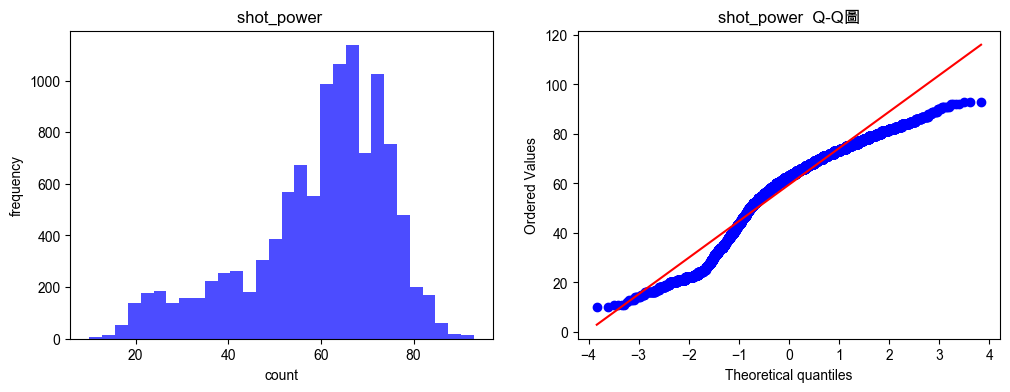

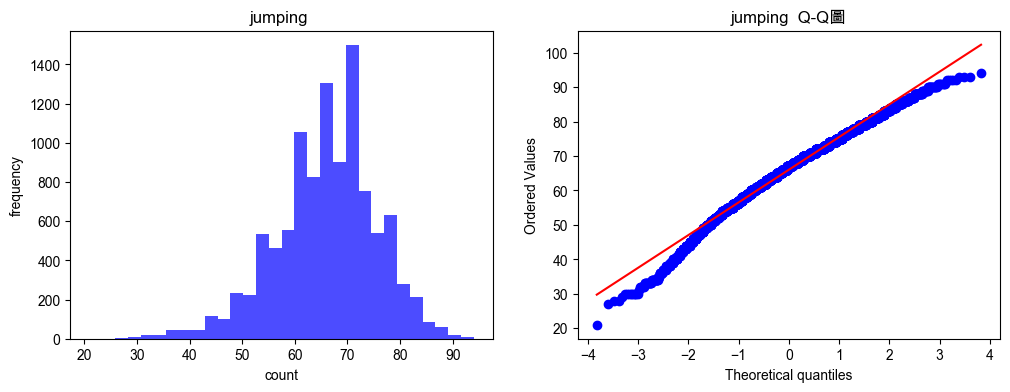

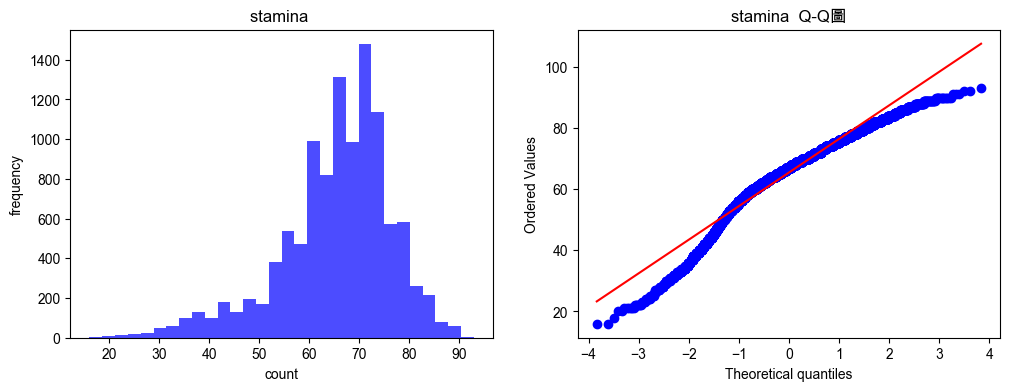

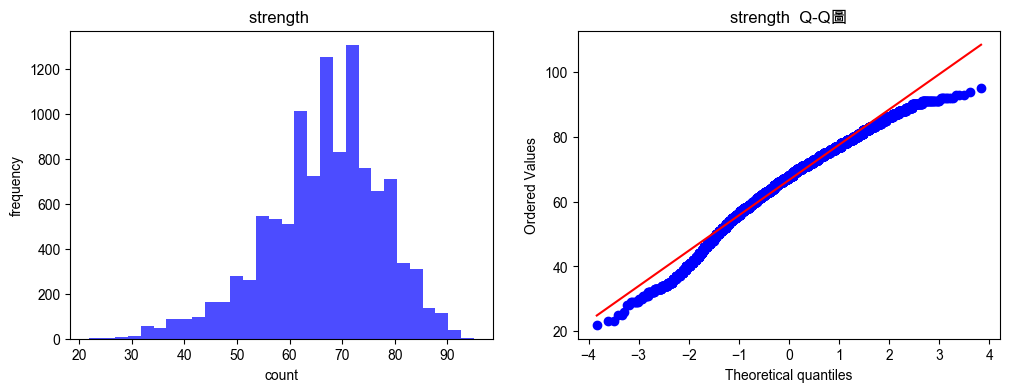

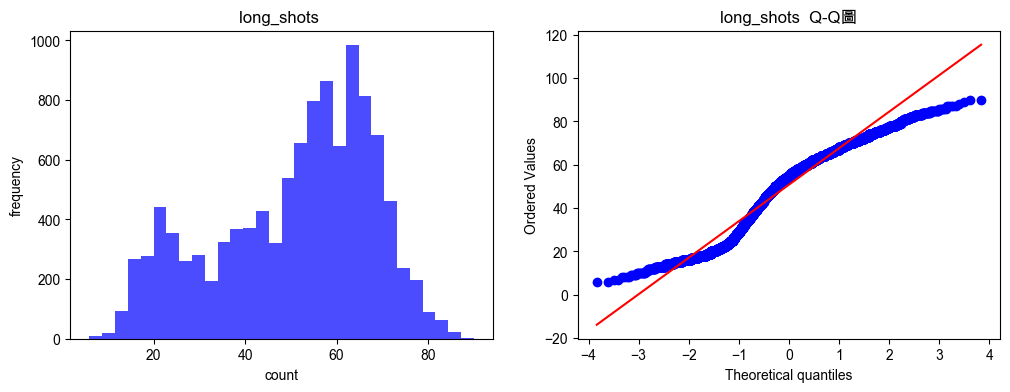

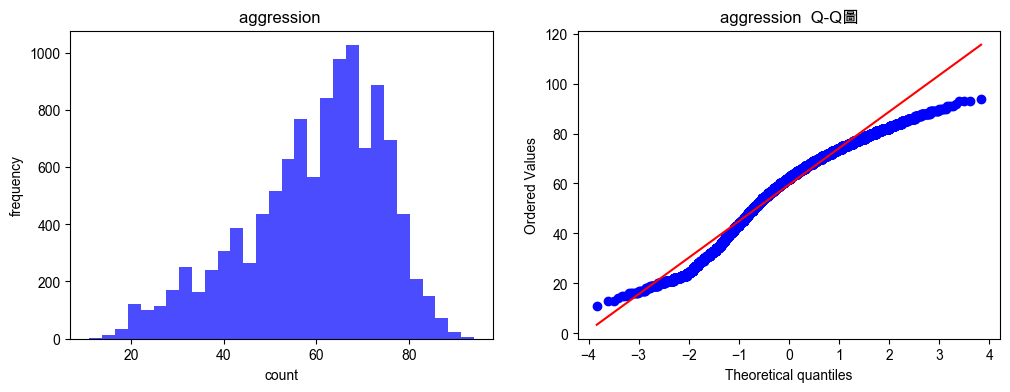

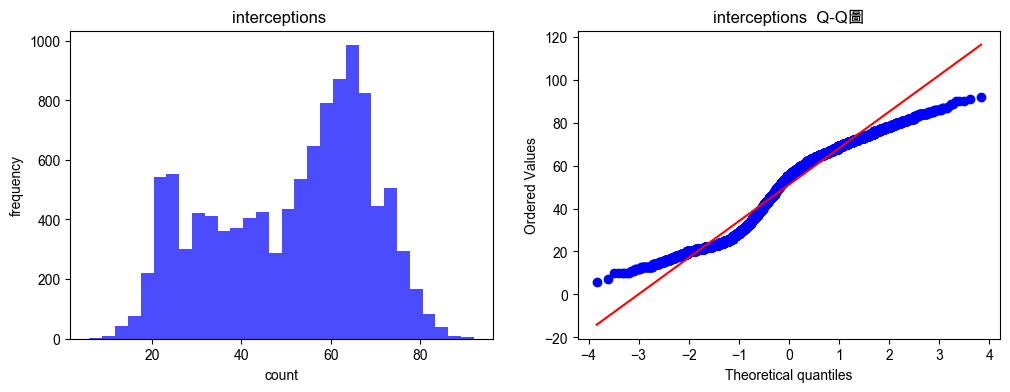

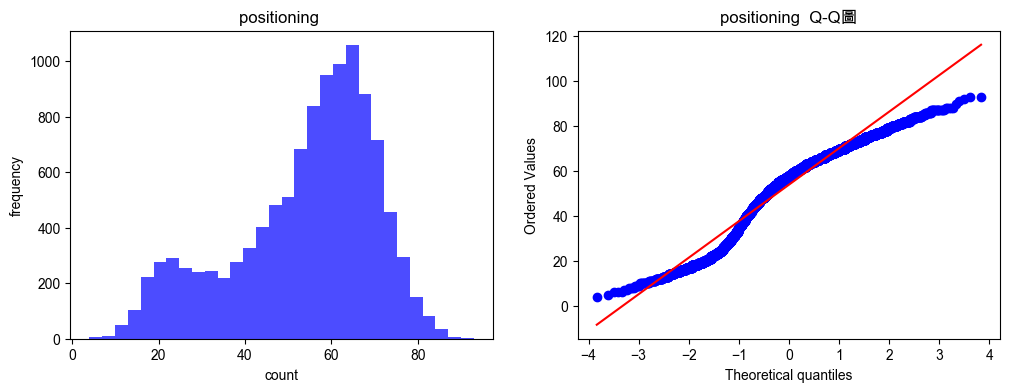

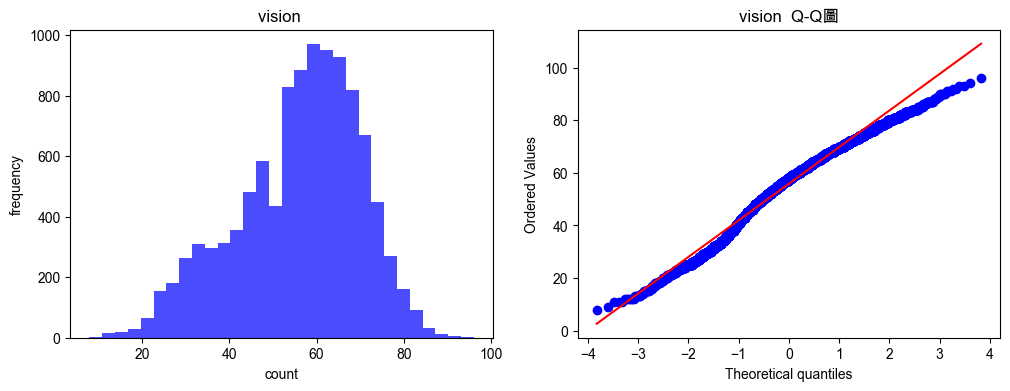

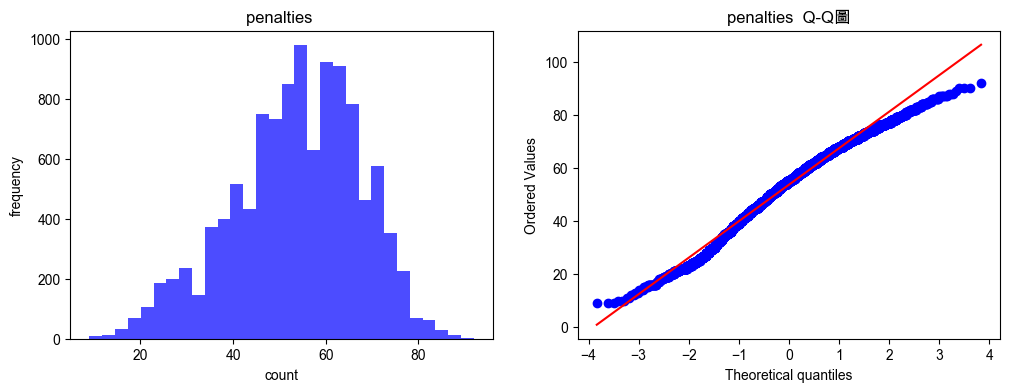

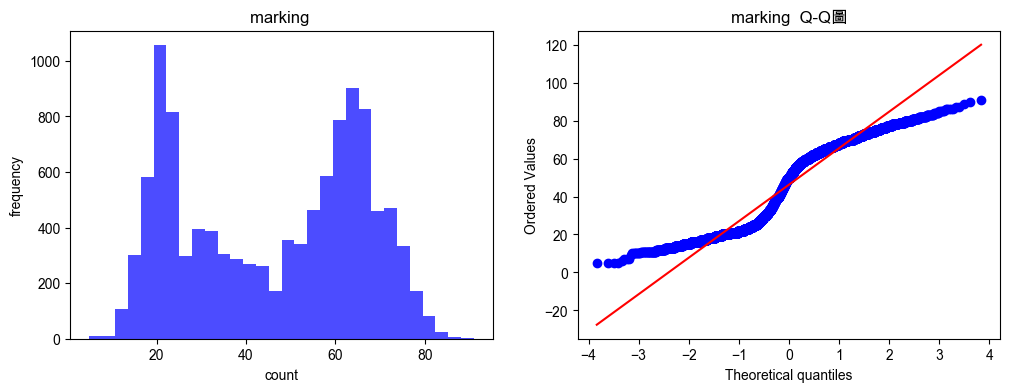

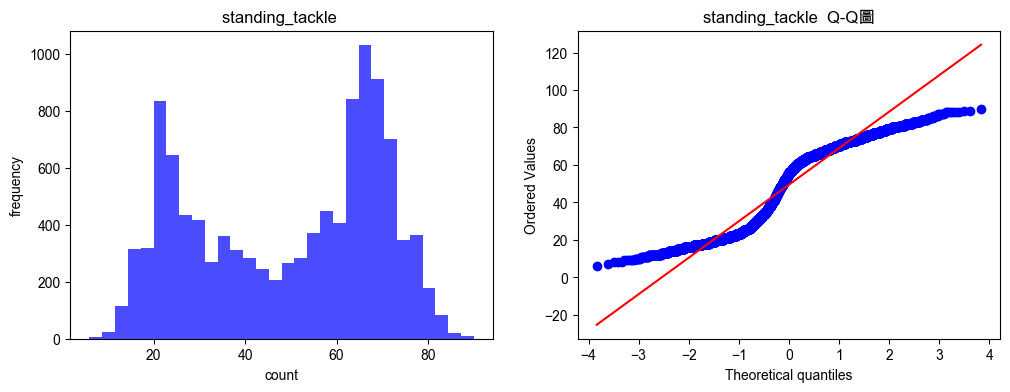

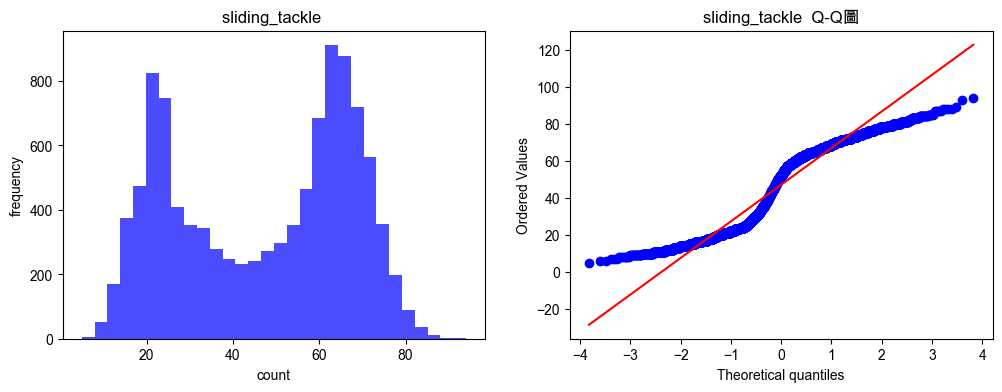

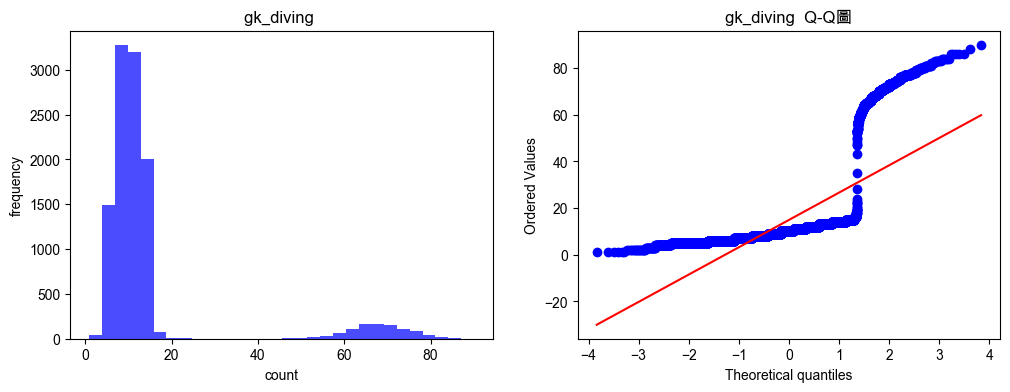

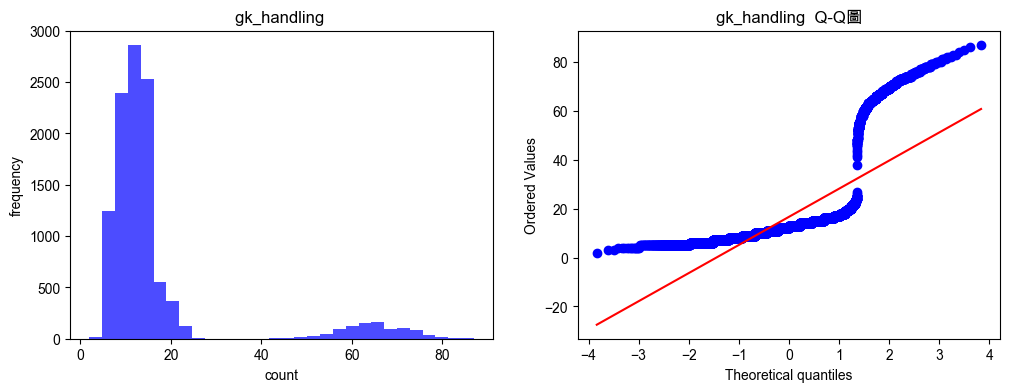

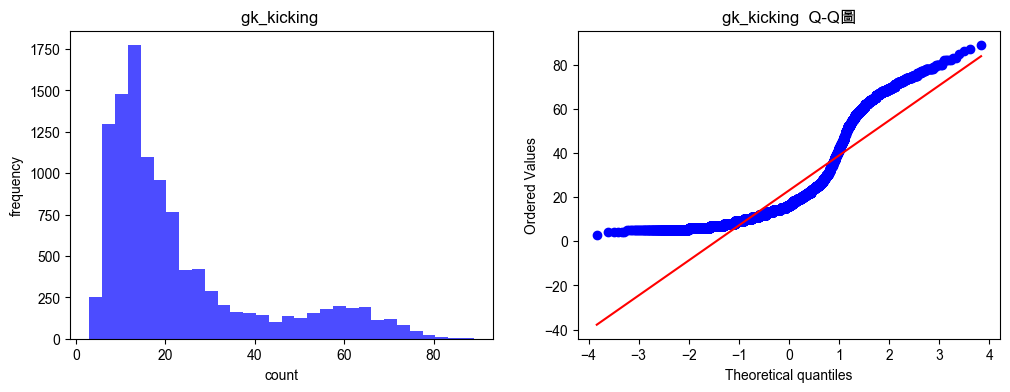

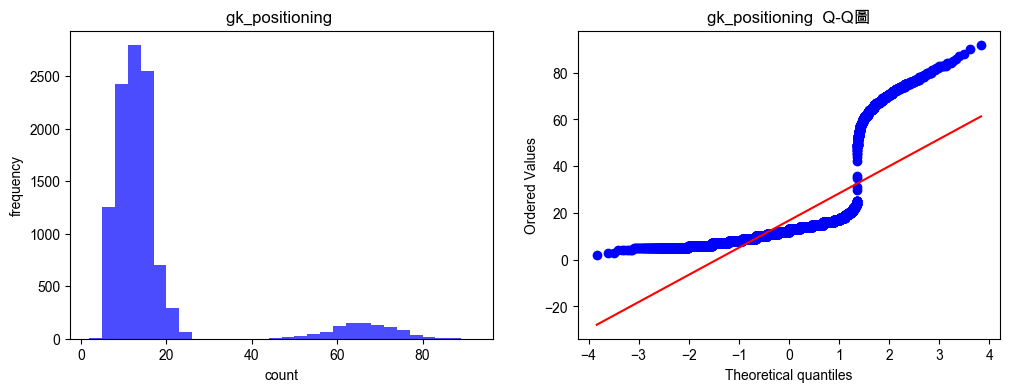

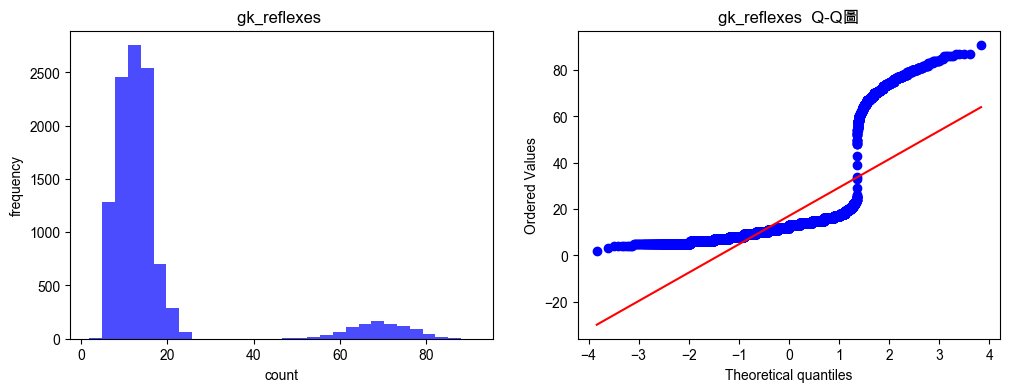

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# 讀取數據
data = pd.read_csv('player_attribute.csv')

# 指定要檢查的欄位
columns_to_check = ['height', 'weight', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
                    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
                    'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
                    'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
                    'gk_kicking', 'gk_positioning', 'gk_reflexes']

# 繪製直方圖和Q-Q圖
for column_name in columns_to_check:
    if column_name in data.columns:
        column_data = data[column_name].dropna()
        
        # 繪製直方圖
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.hist(column_data, bins=30, color='blue', alpha=0.7)
        plt.title(f'{column_name} ')
        plt.xlabel('count')
        plt.ylabel('frequency')
        
        # 繪製Q-Q圖
        plt.subplot(1, 2, 2)
        stats.probplot(column_data, plot=plt)
        plt.title(f'{column_name}  Q-Q圖')
        plt.savefig(f'{column_name}_plot.png')  
        plt.show()


看機率密度圖

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# 讀取數據
data = pd.read_csv('player_attribute.csv')

# 指定要檢查的欄位
columns_to_check = ['height', 'weight', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
                    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
                    'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
                    'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
                    'gk_kicking', 'gk_positioning', 'gk_reflexes']

# 設置繪圖參數
plt.figure(figsize=(12, 8))

# 遍歷欄位並繪製機率密度圖
for column_name in columns_to_check:
    if column_name in data.columns:
        column_data = data[column_name].dropna()
        
        # 繪製機率密度圖
        x = np.linspace(column_data.min(), column_data.max(), 1000)
        pdf = stats.norm.pdf(x, loc=column_data.mean(), scale=column_data.std())
        plt.plot(x, pdf, label=column_name)

# 調整圖例位置到右上角
plt.legend(loc='upper right')

# 添加標題
plt.title("常態分配機率密度圖")

# 顯示圖形
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取數據
data = pd.read_csv('player_attribute.csv')

# 指定要檢查的欄位
columns_to_check = ['height', 'weight', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy',
                    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
                    'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
                    'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
                    'gk_kicking', 'gk_positioning', 'gk_reflexes']

# 設置繪圖參數
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

# 遍歷欄位並繪製分佈圖
for column_name in columns_to_check:
    if column_name in data.columns:
        column_data = data[column_name].dropna()
        
        # 使用Seaborn的sns.distplot繪製分佈圖
        sns.distplot(column_data, bins=50, label=f"{column_name}")
        
# 添加標籤
ax.set_title("各欄位分佈圖")
ax.set_xlabel("數值")
ax.set_ylabel("密度")

# 顯示圖形
plt.legend()
plt.show()


### 檢查欄位遺失值

In [45]:
import pandas as pd

# 從CSV文件讀取資料
player_attribute = pd.read_csv('player_attribute.csv')

# 檢查包含空值的數值型欄位
numerical_columns = []  # 存放數值型欄位

# 處理數值型欄位
for column in player_attribute.columns:
    if pd.api.types.is_numeric_dtype(player_attribute[column]):
        nan_count = player_attribute[column].isnull().sum()
        print(f"數值欄位 ({column}) 包含缺失值數量: {nan_count}")
        
        if column in ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']:
            mode_value = player_attribute[column].mode().iloc[0]
            player_attribute[column].fillna(mode_value, inplace=True)
        else:
            column_mean = player_attribute[column].mean()
            player_attribute[column].fillna(column_mean, inplace=True)
        
        numerical_columns.append(column)
        
# 存儲整理好的資料到新的 CSV 檔案
player_attribute.to_csv('player_continuous.csv', index=False)


數值欄位 (player_api_id) 包含缺失值數量: 0
數值欄位 (height) 包含缺失值數量: 0
數值欄位 (weight) 包含缺失值數量: 0
數值欄位 (overall_rating) 包含缺失值數量: 0
數值欄位 (potential) 包含缺失值數量: 0
數值欄位 (crossing) 包含缺失值數量: 0
數值欄位 (finishing) 包含缺失值數量: 0
數值欄位 (heading_accuracy) 包含缺失值數量: 0
數值欄位 (short_passing) 包含缺失值數量: 0
數值欄位 (volleys) 包含缺失值數量: 478
數值欄位 (dribbling) 包含缺失值數量: 0
數值欄位 (curve) 包含缺失值數量: 478
數值欄位 (free_kick_accuracy) 包含缺失值數量: 0
數值欄位 (long_passing) 包含缺失值數量: 0
數值欄位 (ball_control) 包含缺失值數量: 0
數值欄位 (acceleration) 包含缺失值數量: 0
數值欄位 (sprint_speed) 包含缺失值數量: 0
數值欄位 (agility) 包含缺失值數量: 478
數值欄位 (reactions) 包含缺失值數量: 0
數值欄位 (balance) 包含缺失值數量: 478
數值欄位 (shot_power) 包含缺失值數量: 0
數值欄位 (jumping) 包含缺失值數量: 478
數值欄位 (stamina) 包含缺失值數量: 0
數值欄位 (strength) 包含缺失值數量: 0
數值欄位 (long_shots) 包含缺失值數量: 0
數值欄位 (aggression) 包含缺失值數量: 0
數值欄位 (interceptions) 包含缺失值數量: 0
數值欄位 (positioning) 包含缺失值數量: 0
數值欄位 (vision) 包含缺失值數量: 478
數值欄位 (penalties) 包含缺失值數量: 0
數值欄位 (marking) 包含缺失值數量: 0
數值欄位 (standing_tackle) 包含缺失值數量: 0
數值欄位 (sliding_tackle) 包含缺失值數量: 478
數值欄位 (gk_diving) 包含缺失值數量: 0


In [11]:
import pandas as pd

# 從CSV文件讀取資料
player_attribute = pd.read_csv('./player_attribute.csv')

# 檢查包含空值的欄位
numerical_columns = []  # 存放數值型欄位
categorical_columns = []  # 存放類別型欄位

# 處理數值型欄位
for column in player_attribute.columns:
    if pd.api.types.is_numeric_dtype(player_attribute[column]):
        nan_count = player_attribute[column].isnull().sum()
        print(f"數值欄位 ({column}) 包含缺失值數量: {nan_count}")
        column_mean = player_attribute[column].mean()
        player_attribute[column].fillna(column_mean, inplace=True)
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

# 處理類別型欄位
for column in categorical_columns:
    if column == 'preferred_foot':
        player_attribute[column] = player_attribute[column].apply(lambda x: x if x in ['right', 'left'] else 'unknown')
    elif column == 'attacking_work_rate':
        valid_attacking_work_rates = ['medium', 'high', 'low']
        player_attribute[column] = player_attribute[column].apply(lambda x: x if x in valid_attacking_work_rates else 'unknown')
    elif column == 'defensive_work_rate':
        valid_defensive_work_rates = ['medium', 'high', 'low']
        player_attribute[column] = player_attribute[column].apply(lambda x: x if x in valid_defensive_work_rates else 'unknown')


# 將整合後的資料寫回CSV文件
player_attribute.to_csv('player_clean3.csv', index=False)


數值欄位 (player_api_id) 包含缺失值數量: 0
數值欄位 (height) 包含缺失值數量: 0
數值欄位 (weight) 包含缺失值數量: 0
數值欄位 (overall_rating) 包含缺失值數量: 0
數值欄位 (potential) 包含缺失值數量: 0
數值欄位 (crossing) 包含缺失值數量: 0
數值欄位 (finishing) 包含缺失值數量: 0
數值欄位 (heading_accuracy) 包含缺失值數量: 0
數值欄位 (short_passing) 包含缺失值數量: 0
數值欄位 (volleys) 包含缺失值數量: 478
數值欄位 (dribbling) 包含缺失值數量: 0
數值欄位 (curve) 包含缺失值數量: 478
數值欄位 (free_kick_accuracy) 包含缺失值數量: 0
數值欄位 (long_passing) 包含缺失值數量: 0
數值欄位 (ball_control) 包含缺失值數量: 0
數值欄位 (acceleration) 包含缺失值數量: 0
數值欄位 (sprint_speed) 包含缺失值數量: 0
數值欄位 (agility) 包含缺失值數量: 478
數值欄位 (reactions) 包含缺失值數量: 0
數值欄位 (balance) 包含缺失值數量: 478
數值欄位 (shot_power) 包含缺失值數量: 0
數值欄位 (jumping) 包含缺失值數量: 478
數值欄位 (stamina) 包含缺失值數量: 0
數值欄位 (strength) 包含缺失值數量: 0
數值欄位 (long_shots) 包含缺失值數量: 0
數值欄位 (aggression) 包含缺失值數量: 0
數值欄位 (interceptions) 包含缺失值數量: 0
數值欄位 (positioning) 包含缺失值數量: 0
數值欄位 (vision) 包含缺失值數量: 478
數值欄位 (penalties) 包含缺失值數量: 0
數值欄位 (marking) 包含缺失值數量: 0
數值欄位 (standing_tackle) 包含缺失值數量: 0
數值欄位 (sliding_tackle) 包含缺失值數量: 478
數值欄位 (gk_diving) 包含缺失值數量: 0


### 將補值後的欄位寫回CSV文件

In [12]:
import pandas as pd

# 讀取整合後的數據
data = pd.read_csv('player_clean.csv')

# 找到有小數點的列，並轉換成整數
for column in data.columns:
    if data[column].dtype == 'float64':
        decimal_values = (data[column] % 1 != 0)
        if decimal_values.any():
            data[column] = data[column].round(0)

# 將修改後的數據寫回CSV文件
data.to_csv('player_clean.csv', index=False)
